Generate Comparative report for all the synthetic data

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [9]:
%store -r synthetic_data_mapping

In [14]:
synthetic_data_mapping

{'adult': [],
 'breast_cancer': [],
 'heart': [],
 'iris': [],
 'credit': [],
 'syn_adult': [       age         workclass  fnlwgt     education  education.num  \
  0       35           Private  170472          10th             13   
  1       63                 ?  111842       HS-grad              9   
  2       17                 ?   86605          10th              8   
  3       33           Private  130340  Some-college             10   
  4       52           Private  165133       HS-grad              9   
  ...    ...               ...     ...           ...            ...   
  32556   30           Private  154626       HS-grad              9   
  32557   64  Self-emp-not-inc  575230       HS-grad             10   
  32558   23           Private  146300       HS-grad              9   
  32559   33           Private  266233       HS-grad              9   
  32560   55                 ?  183974       HS-grad              9   
  
             marital.status         occupation    rela

In [4]:
%store -r df1
%store -r df4

In [4]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [1]:
df1.name

NameError: name 'df1' is not defined

In [9]:
synthetic_data_mapping['syn_'+'adult'][1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
def generate_continuous_var_plots(df):
    


In [10]:
stats.ks_2samp(df1['age'], synthetic_data_mapping['syn_'+'adult'][0]['age'])

KstestResult(statistic=0.05457449095543743, pvalue=1.3860399500014613e-42)

In [11]:
stats.ks_2samp(df1['age'], synthetic_data_mapping['syn_'+'adult'][1]['age'])

KstestResult(statistic=0.08110930253984827, pvalue=1.3033851965674792e-93)

In [12]:
stats.ks_2samp(synthetic_data_mapping['syn_'+'adult'][0]['age'], synthetic_data_mapping['syn_'+'adult'][1]['age'])

KstestResult(statistic=0.05832130462823626, pvalue=1.4151057458098246e-48)

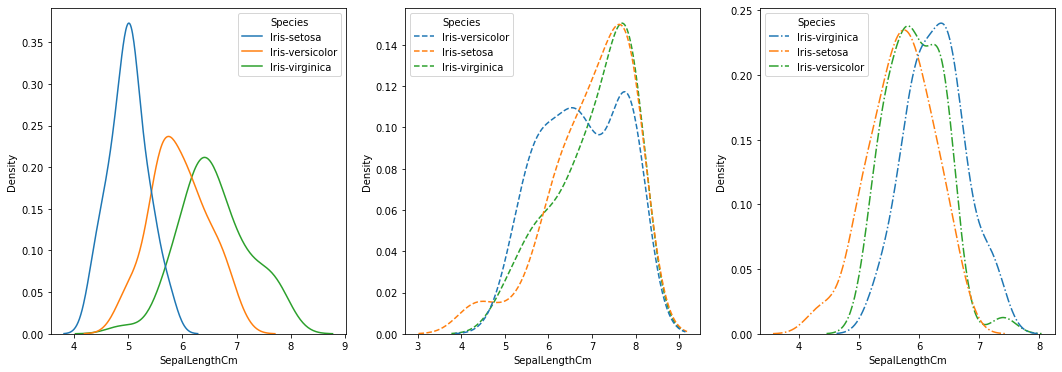

In [6]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
sns.kdeplot(data=df4, ax=ax0, x='SepalLengthCm', hue='Species')
sns.kdeplot(data=synthetic_data_mapping['syn_' + 'iris'][0], ax=ax1, x='SepalLengthCm', hue='Species', label='ctgan', ls='--')
sns.kdeplot(data=synthetic_data_mapping['syn_' + 'iris'][1], ax=ax2, x='SepalLengthCm', hue='Species', label='tvae', ls='-.')
plt.show()

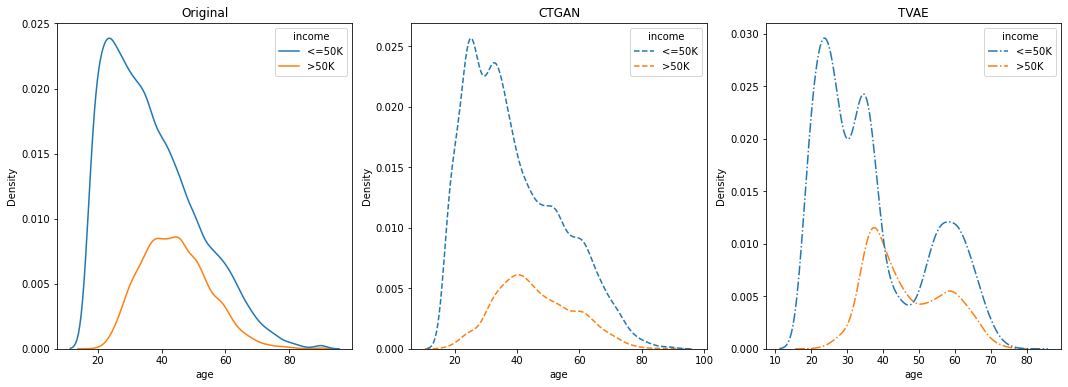

In [7]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
sns.kdeplot(data=df1,ax=ax0, x='age', hue='income').set(title="Original")
sns.kdeplot(data=synthetic_data_mapping['syn_' + 'adult'][0],ax=ax1, x='age', hue='income', label='ctgan', ls='--').set(title="CTGAN")
sns.kdeplot(data=synthetic_data_mapping['syn_' + 'adult'][1],ax=ax2, x='age', hue='income', label='tvae', ls='-.').set(title="TVAE")
plt.show()